In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment1(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp1')
    exp_MAB_1.segments_means(param1=3,param2=6)
    df = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df

The true optimal arm is: 5
time: 13.079607963562012


<AxesSubplot:xlabel='arm', ylabel='reward'>

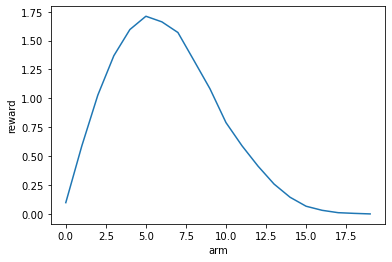

In [3]:
#changeable parameters
np.random.seed(777)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 10
exp_MAB_1, df = set_experiment1(price_list=price_list, segments=segments, update_freq =10)
sns.lineplot(data=df.groupby('arm')['reward'].mean())

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 1153
Detected Sign: -1
Reward change detected at time: 1246
Detected Sign: 1
trial 0 IDS_1 time: 33.544164180755615
Reward change detected at time: 415
Detected Sign: -1
Detector cooling
Reward change detected at time: 539
Detected Sign: -1
Reward change detected at time: 785
Detected Sign: -1
Detector cooling
Reward change detected at time: 1055
Detected Sign: -1
Reward change detected at time: 1290
Detected Sign: -1
Reward change detected at time: 1847
Detected Sign: 1
Detector cooling
Detector cooling
trial 1 IDS_1 time: 86.78296566009521
Reward change detected at time: 638
Detected Sign: -1
Reward change detected at time: 1299
Detected Sign: -1
Detector cooling
Detector cooling
Reward change detected at time: 1539
Detected Sign: -1
Detector cooling
Detector cooling
trial 2 IDS_1 time: 47.85451912879944
Reward change detected at time: 1042
Detected Sign: -1
Detector cooling
Reward change detected at time: 1312
Detected Sign: -1
Reward change detected 

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
IDST_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])
    IDST_1_df_arm = IDST_1_df_arm.append([IDST_1_arm])

Reward change detected at time: 354
Detected Sign: 1
Reward change detected at time: 604
Detected Sign: -1
Reward change detected at time: 1100
Detected Sign: -1
Reward change detected at time: 1447
Detected Sign: -1
trial 0 IDST_1 time: 94.86467790603638
Reward change detected at time: 1348
Detected Sign: -1
trial 1 IDST_1 time: 21.92208170890808
Reward change detected at time: 1704
Detected Sign: -1
Reward change detected at time: 1865
Detected Sign: 1
trial 2 IDST_1 time: 31.939961910247803
Reward change detected at time: 630
Detected Sign: -1
Reward change detected at time: 1636
Detected Sign: 1
trial 3 IDST_1 time: 43.58369779586792
Reward change detected at time: 182
Detected Sign: 1
Reward change detected at time: 270
Detected Sign: -1
Reward change detected at time: 337
Detected Sign: -1
Detector cooling
Reward change detected at time: 1752
Detected Sign: 1
Detector cooling
trial 4 IDST_1 time: 101.7680311203003
Reward change detected at time: 476
Detected Sign: -1
Detector coo

In [6]:
#IDS_2 L=4 n=1
IDS_2_df = pd.DataFrame()
IDS_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_2 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_2_sum, IDS_2_pt, IDS_2_re, IDS_2_arm, IDS_2_post = IDS_2.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_2 time:',end-start)
    IDS_2_df = IDS_2_df.append([np.cumsum(IDS_2_re)])
    IDS_2_df_arm = IDS_2_df_arm.append([IDS_2_arm])
    
#IDS_3 L=2 n=2
IDS_3_df = pd.DataFrame()
IDS_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_3 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=2, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_3_sum, IDS_3_pt, IDS_3_re, IDS_3_arm, IDS_3_post = IDS_3.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_3 time:',end-start)
    IDS_3_df = IDS_3_df.append([np.cumsum(IDS_3_re)])
    IDS_3_df_arm = IDS_3_df_arm.append([IDS_3_arm])

Reward change detected at time: 608
Detected Sign: -1
Reward change detected at time: 1020
Detected Sign: -1
Detector cooling
trial 0 IDS_2 time: 35.51638889312744
Reward change detected at time: 401
Detected Sign: -1
Detector cooling
Detector cooling
Reward change detected at time: 686
Detected Sign: -1
Reward change detected at time: 709
Detected Sign: -1
Reward change detected at time: 1186
Detected Sign: -1
Reward change detected at time: 1431
Detected Sign: -1
Reward change detected at time: 1874
Detected Sign: -1
Reward change detected at time: 1939
Detected Sign: -1
trial 1 IDS_2 time: 98.73072910308838
Reward change detected at time: 338
Detected Sign: -1
Reward change detected at time: 783
Detected Sign: -1
Detector cooling
Reward change detected at time: 1514
Detected Sign: -1
trial 2 IDS_2 time: 48.706520080566406
Reward change detected at time: 615
Detected Sign: -1
Reward change detected at time: 759
Detected Sign: 1
Reward change detected at time: 1068
Detected Sign: -1
D

In [7]:
# UCB1 c=1
UCB_1_df = pd.DataFrame()
UCB_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_1 time:',end-start)
    UCB_1_df = UCB_1_df.append([np.cumsum(UCB1_re)])
    UCB_1_df_arm = UCB_1_df_arm.append([UCB1_arm])

# UCB1 c=2
UCB_2_df = pd.DataFrame()
UCB_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_2 time:',end-start)
    UCB_2_df = UCB_2_df.append([np.cumsum(UCB1_re)])
    UCB_2_df_arm = UCB_2_df_arm.append([UCB1_arm])
    

# UCB-tuned
UCBT_df = pd.DataFrame()
UCBT_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB-tuned time:',end-start)
    UCBT_df = UCBT_df.append([np.cumsum(UCB1_re)])
    UCBT_df_arm = UCBT_df_arm.append([UCB1_arm])
    
# UCBPI
UCBPI_df = pd.DataFrame()
UCBPI_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False, tuned=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    UCBPI_df_arm = UCBPI_df_arm.append([UCBPI_arm])
    
# TS
TS_df = pd.DataFrame()
TS_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])
    TS_df_arm = TS_df_arm.append([TS_arm])

# EG e=0.05
EG_1_df = pd.DataFrame()
EG_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.05)
    end = time.time()
    print('trial',i, 'EG 0.05 time:',end-start)
    EG_1_df = EG_1_df.append([np.cumsum(EG_re)])
    EG_1_df_arm = EG_1_df_arm.append([EG_arm])

# EG p=0.1
EG_2_df = pd.DataFrame()
EG_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG 0.1 time:',end-start)
    EG_2_df = EG_2_df.append([np.cumsum(EG_re)])
    EG_2_df_arm = EG_2_df_arm.append([EG_arm])
    
# EG e=0.15
EG_3_df = pd.DataFrame()
EG_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.15)
    end = time.time()
    print('trial',i, 'EG 0.15 time:',end-start)
    EG_3_df = EG_3_df.append([np.cumsum(EG_re)])
    EG_3_df_arm = EG_3_df_arm.append([EG_arm])

trial 0 UCB_1 time: 0.7386741638183594
trial 1 UCB_1 time: 0.7386250495910645
trial 2 UCB_1 time: 0.7364077568054199
trial 3 UCB_1 time: 0.7377669811248779
trial 4 UCB_1 time: 0.7384121417999268
trial 5 UCB_1 time: 0.7382080554962158
trial 6 UCB_1 time: 0.7363550662994385
trial 7 UCB_1 time: 0.7359321117401123
trial 8 UCB_1 time: 0.7342109680175781
trial 9 UCB_1 time: 0.7371640205383301
trial 0 UCB_2 time: 0.73443603515625
trial 1 UCB_2 time: 0.7363908290863037
trial 2 UCB_2 time: 0.7349200248718262
trial 3 UCB_2 time: 0.7329978942871094
trial 4 UCB_2 time: 0.7372491359710693
trial 5 UCB_2 time: 0.7371120452880859
trial 6 UCB_2 time: 0.732349157333374
trial 7 UCB_2 time: 0.7360200881958008
trial 8 UCB_2 time: 0.734591007232666
trial 9 UCB_2 time: 0.7358829975128174
trial 0 UCB-tuned time: 1.4004578590393066
trial 1 UCB-tuned time: 1.3720948696136475
trial 2 UCB-tuned time: 1.372093915939331
trial 3 UCB-tuned time: 1.3130059242248535
trial 4 UCB-tuned time: 1.3859350681304932
trial 5 UC

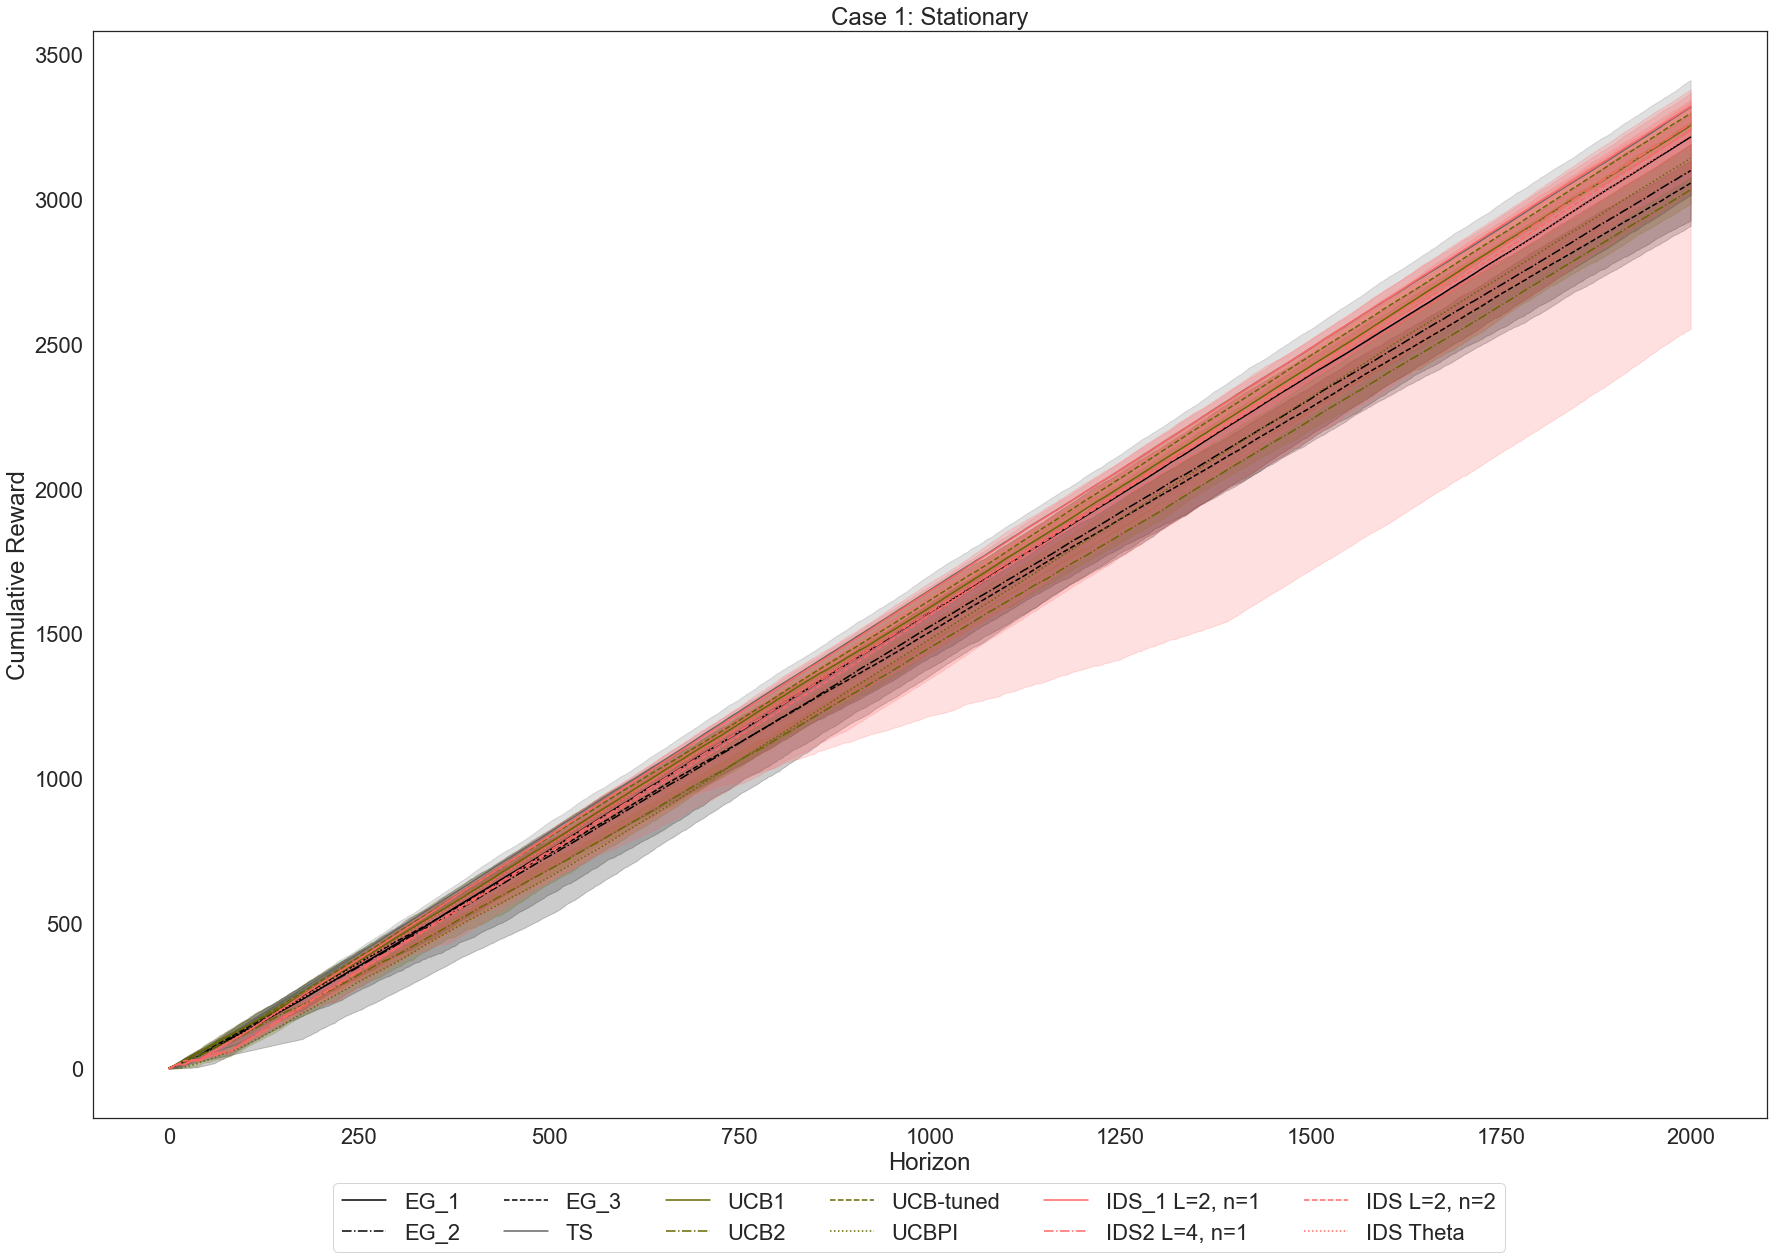

In [8]:
title = 'Case 1: Stationary'
draw_exp_graph(IDS_1_df, IDS_2_df, IDS_3_df, IDST_1_df,UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title)

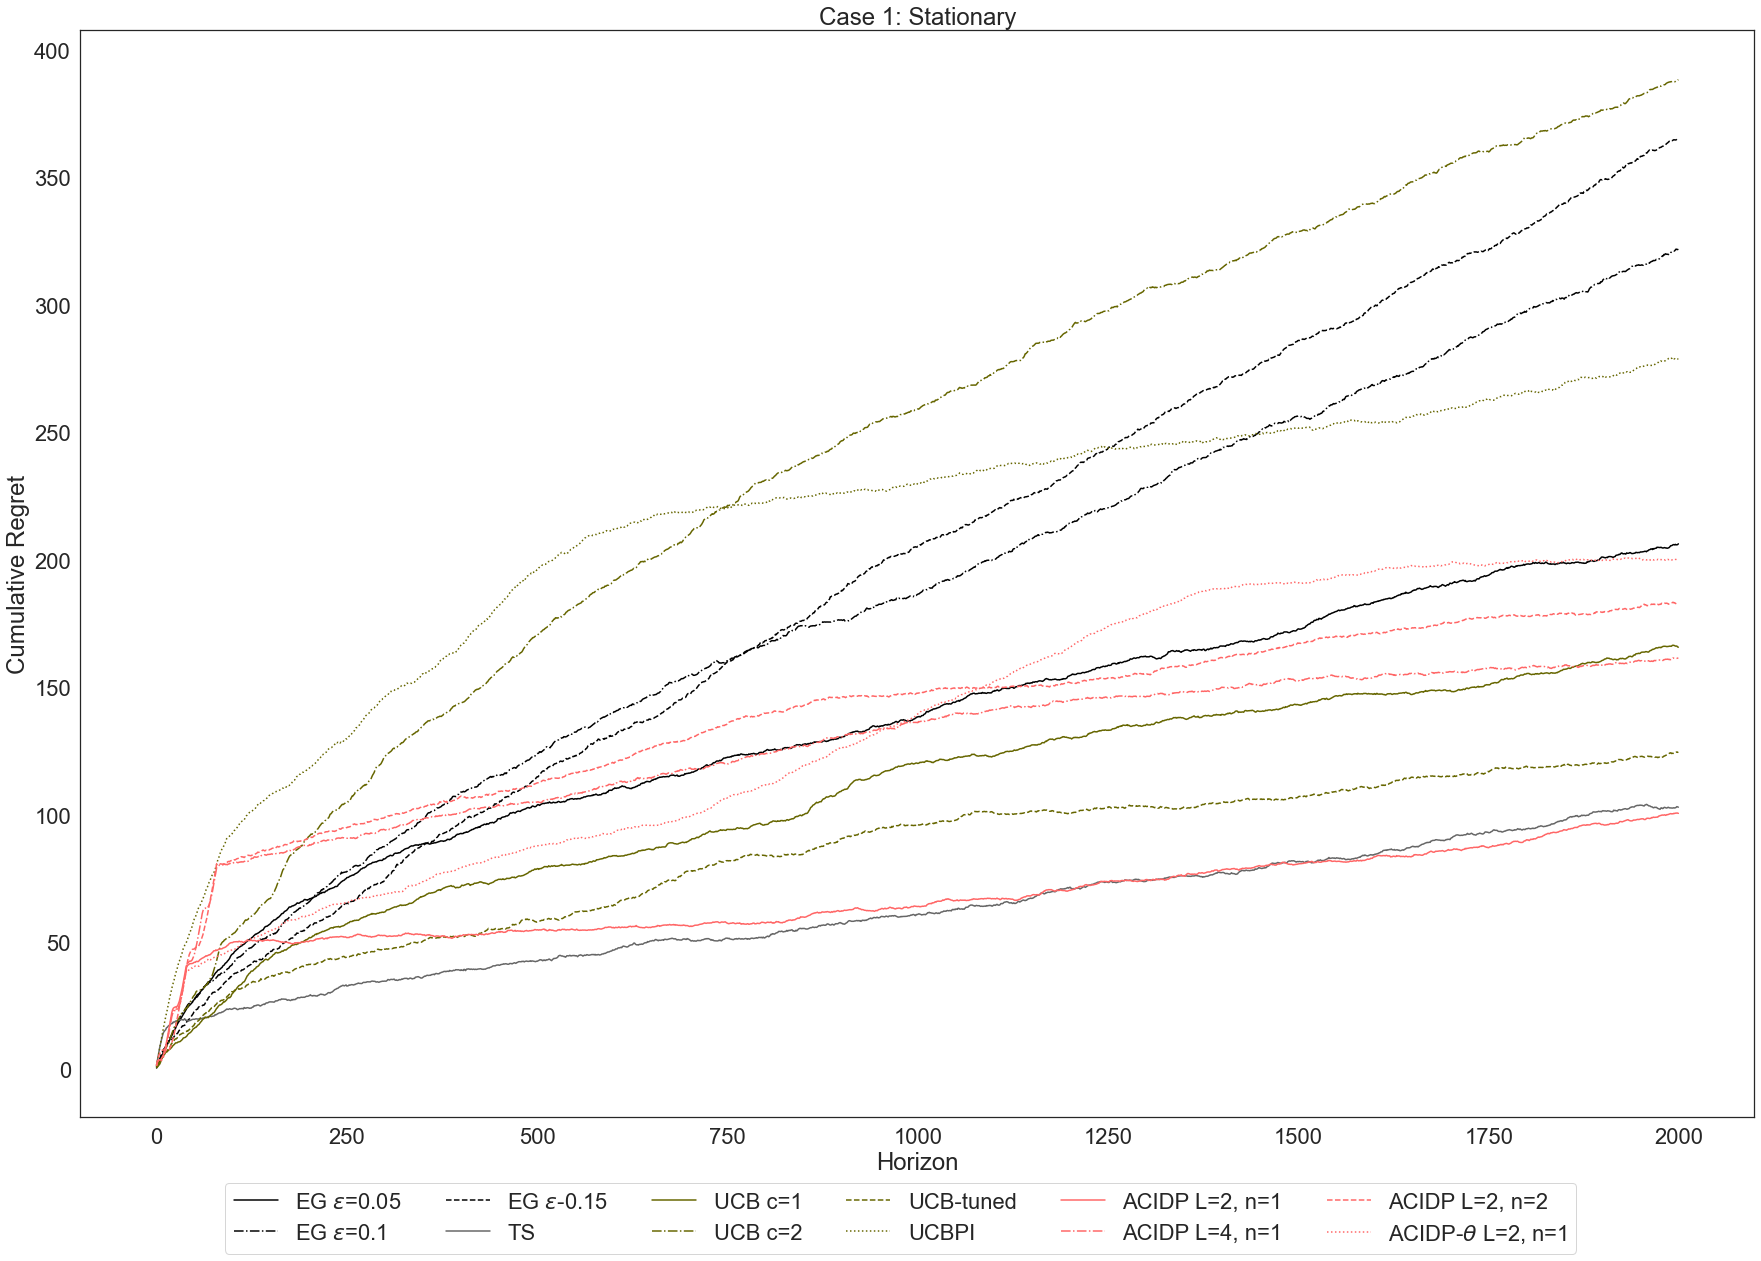

In [15]:
optimal_reward_per = pd.DataFrame(np.repeat(max(df.groupby('arm')['reward'].mean()), T)).T
optimal_reward = optimal_reward_per.cumsum(axis=1)
draw_regret(optimal_reward, IDS_1_df, IDS_2_df, IDS_3_df, IDST_1_df,UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title, bounds=False)

In [ ]:
draw_arm_withopt(IDS_1_df_arm, TS_df_arm, UCB_2_df_arm, EG_1_df_arm, optimal_arm=np.repeat(5, T))